# Regresi Linear Sederhana

Dalam analisis ini, kita akan memodelkan hubungan antara satu variabel independen (X) dan satu variabel dependen (y) menggunakan persamaan regresi sederhana.

## Pendahuluan

Dalam statistik, regresi sederhana adalah metode untuk memodelkan hubungan antara satu variabel dependen (Y) dan satu variabel independen (X). Persamaan regresi sederhana dapat ditulis sebagai berikut:

$$ y = \beta_0 + \beta_1 X + \varepsilon $$

Dimana:
- $y$ : adalah variabel dependen,
- $X$ : adalah variabel independen,
- $\beta_0$ : adalah intercept,
- $\beta_1$ : adalah koefisien regresi,
- $\varepsilon$ : error.

### Import Library

In [5]:
import numpy as np
import pandas as pd

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# operasi statistik
from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Evaluasi Model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

### Load Data

In [6]:
df = pd.read_csv('studentscores.csv')
df

,Hours,Scores
0,2.5,26
1,5.1,53
2,3.2,34
3,8.5,87
4,3.5,38
5,1.5,18
6,9.2,96
7,5.5,60
8,8.3,84
9,2.7,28


### Deskripsi Statistik data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,28.0,4.717857,2.533487,1.1,2.50,4.15,7.025,9.2
Scores,28.0,49.321429,25.761087,15.0,26.75,43.00,75.250,96.0


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.996977
Scores,0.996977,1.000000


In [9]:
# Memisahkan fitur dan target
X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values

### Splitting data

In [10]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Regresi

In [11]:
# 1. Bangun model regresi linear sederhana
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Tampilkan nilai intercept dan coefisien
print("Intercept:", regression_model.intercept_)
print("Coefisien:", regression_model.coef_[0])

Intercept: 1.5332196676138778
Coefisien: 10.141841040213553


$$ y = 1.53 + 10.14 X $$

In [11]:
1.53 + 10.14 * 3 

31.950000000000003

### Prediksi Model

In [15]:
# Prediksi nilai menggunakan data uji
y_pred = regression_model.predict(X_test)
y_pred

array([33.987111  , 40.07221562, 12.68924481, 20.80271764, 16.74598123,
       61.3700818 ])

In [10]:
y_test

array([34, 35, 15, 19, 18, 63], dtype=int64)

In [11]:
# Gabungkan nilai y_test dan y_pred ke dalam DataFrame
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
0,34,33.987111
1,35,40.072216
2,15,12.689245
3,19,20.802718
4,18,16.745981
5,63,61.370082


### Evaluasi Model

In [12]:
# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 6.424352378937957


In [13]:
# Hitung Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.08162819724366875


In [14]:
# Hitung R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Coefficient of Determination (R-squared): 0.9761668708118543


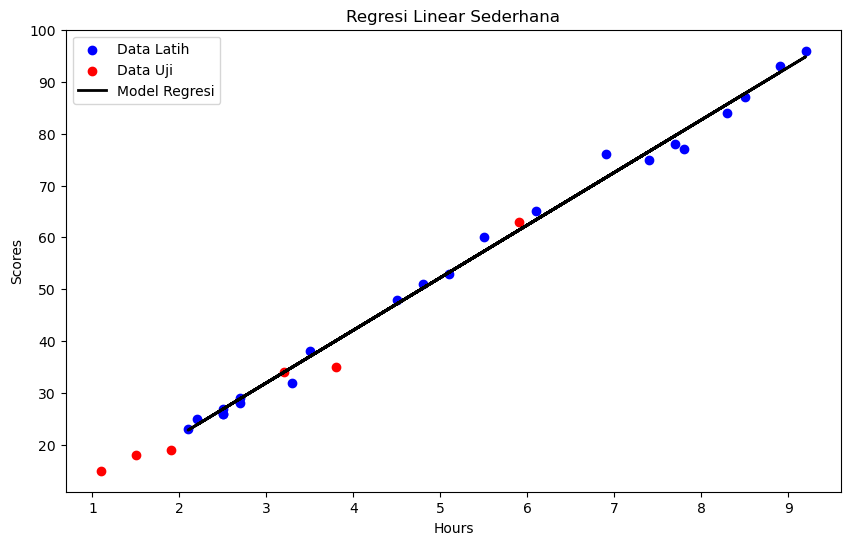

In [15]:
# 3. Visualisasikan model regresi
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Data Latih')
plt.scatter(X_test, y_test, color='red', label='Data Uji')
plt.plot(X_train, regression_model.predict(X_train), color='black', linewidth=2, label='Model Regresi')
plt.title('Regresi Linear Sederhana')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

### uji normalitas

In [16]:
# Hitung residu
residuals = y_test - y_pred

# Uji normalitas menggunakan Shapiro-Wilk test
stat, p_value = stats.shapiro(residuals)
print("Uji Shapiro-Wilk (H0: Residuals terdistribusi normal):")
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)
if p_value > 0.05:
    print("Tidak ada cukup bukti untuk menolak H0, Maka residuals berdistribusi normal")
else:
    print("Terdapat cukup bukti untuk menolak H0, Maka residuals tidak berdistribusi normal")

Uji Shapiro-Wilk (H0: Residuals terdistribusi normal):
Shapiro-Wilk Test Statistic: 0.8894888162612915
p-value: 0.31551823019981384
Tidak ada cukup bukti untuk menolak H0, Maka residuals berdistribusi normal
